# Dom Sibley
I am going to look at Dom Sibley's current test record and explore the formatting of the batting innings list page that ESPN has.  

I have already written code that loops through the matches of a given player and can find out additional details, but this summary page exists that may allow us to scrape the data quicker and more efficiently. That innings breakdown page can be found [here](https://stats.espncricinfo.com/ci/engine/player/519082.html?class=1;template=results;type=batting;view=innings). 

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import requests
from bs4 import BeautifulSoup
import re

In [2]:
url = 'http://stats.espncricinfo.com/ci/engine/player/519082.html?class=1;template=results;type=batting;view=innings'
sibley_soup = BeautifulSoup(requests.get(url).text, features="html.parser")

Once we have the `soup` for the page, we can pull the main table using the caption in the HTML. 

In [3]:
for caption in sibley_soup.find_all('caption'):
    if caption.get_text() == 'Innings by innings list':
        main_table = caption.find_parent(
            'table', {'class': 'engineTable'})

In [4]:
columns = [header.get_text() for header in main_table.find('thead').find_all('tr')[0].find_all('th')]
rows = []

for innings in [
        row for row in main_table.find('tbody').find_all('tr')]:
    rows.append([stat.get_text() for stat in innings.find_all('td')])
    
sibley_innings = pd.DataFrame(rows, columns=columns).apply(pd.to_numeric, errors='ignore')

In [5]:
sibley_innings

,Runs,Mins,BF,4s,6s,SR,Pos,Dismissal,Inns,,Opposition,Ground,Start Date,
0,22,92,63,4,0,34.92,2,caught,1,NaN,v New Zealand,Mount Maunganui,21 Nov 2019,Test # 2367
1,12,94,62,1,0,19.35,2,caught,3,NaN,v New Zealand,Mount Maunganui,21 Nov 2019,Test # 2367
2,4,30,20,0,0,20.00,2,lbw,2,NaN,v New Zealand,Hamilton,29 Nov 2019,Test # 2371
3,4,25,12,1,0,33.33,2,caught,2,NaN,v South Africa,Centurion,26 Dec 2019,Test # 2377
4,29,118,90,5,0,32.22,2,caught,4,NaN,v South Africa,Centurion,26 Dec 2019,Test # 2377
5,34,107,76,7,0,44.73,2,caught,1,NaN,v South Africa,Cape Town,3 Jan 2020,Test # 2379
6,133*,497,311,19,1,42.76,2,not out,3,NaN,v South Africa,Cape Town,3 Jan 2020,Test # 2379
7,36,135,95,5,0,37.89,2,caught,1,NaN,v South Africa,Port Elizabeth,16 Jan 2020,Test # 2380
8,44,153,93,7,0,47.31,2,caught,1,NaN,v South Africa,Johannesburg,24 Jan 2020,Test # 2382
9,44,157,107,7,0,41.12,2,caught,3,NaN,v South Africa,Johannesburg,24 Jan 2020,Test # 2382


Let's just focus on the balls faced by the young opener. His determination to survive at the crease and act as a barrier to those lower down the order has been noted as one of his strengths. 

In [6]:
total_balls_faced = sibley_innings.BF.sum()
average_innings_balls_faced = sibley_innings.BF.mean()

print(total_balls_faced)
print(average_innings_balls_faced)

929
92.9


We can see he has opened the batting for England 10 times, and has already faced 929 balls. This is something that seems impressive, and Sibley has a reputation for facing a lot of balls in county championship cricket as well. 

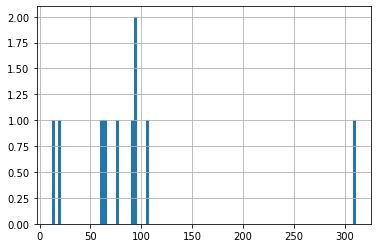

In [7]:
sibley_innings.BF.hist(bins=100)
plt.show()

It is interesting with the consistency that he appears to get past 50 balls faced, giving the other players in the team a chance to come in when the opposition bowlers already having bowled many overs; providing protection to the middle order. 

Let's compare this to Keaton Jennings, who struggled with against pace at the highest level, but remains a brilliant player of spin; even opening the debate about picking him for a sub continent tour. 

In [8]:
jennings = 'http://stats.espncricinfo.com/ci/engine/player/440780.html?class=1;template=results;type=batting;view=innings'
jennings_soup = BeautifulSoup(requests.get(jennings).text, features="html.parser")

In [9]:
for caption in jennings_soup.find_all('caption'):
    if caption.get_text() == 'Innings by innings list':
        jen_table = caption.find_parent(
            'table', {'class': 'engineTable'})

In [10]:
columns = [header.get_text() for header in jen_table.find('thead').find_all('tr')[0].find_all('th')]
rows = []

for innings in [
        row for row in jen_table.find('tbody').find_all('tr')]:
    rows.append([stat.get_text() for stat in innings.find_all('td')])
    
jenning_innings = pd.DataFrame(rows, columns=columns).apply(pd.to_numeric, errors='ignore')

In [11]:
jenning_innings.BF.sum()

1838

In [12]:
jenning_innings.BF.mean()

57.4375

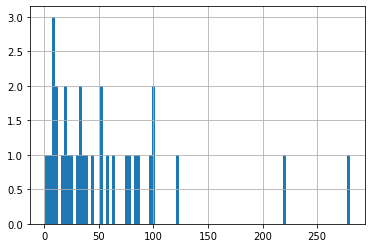

In [13]:
jenning_innings.BF.hist(bins=100)
plt.show()

Jennings on the other handle often caused pressure on the middle order by departing early in an innings. 

Perhaps England's greatest ever opener, Cook remains the standard to which openers are compared and the spot in the team that we're struggling to replace. 

In [14]:
cook = 'http://stats.espncricinfo.com/ci/engine/player/11728.html?class=1;template=results;type=batting;view=innings'
cook_soup = BeautifulSoup(requests.get(cook).text, features="html.parser")

In [15]:
for caption in cook_soup.find_all('caption'):
    if caption.get_text() == 'Innings by innings list':
        cook_table = caption.find_parent(
            'table', {'class': 'engineTable'})

In [16]:
columns = [header.get_text() for header in cook_table.find('thead').find_all('tr')[0].find_all('th')]
rows = []

for innings in [row for row in cook_table.find('tbody').find_all('tr')]:
    rows.append([stat.get_text() for stat in innings.find_all('td')])
    
cook_innings = pd.DataFrame([x for x in rows if x[0] != 'DNB'], columns=columns).apply(pd.to_numeric, errors='ignore')

In [17]:
cook_innings.BF.sum()

26562

In [18]:
cook_innings.BF.mean()

91.27835051546391

Everyone knows that Cook was one of England's greatest openers, if not __the__ greatest, and his average of 91 balls per innings is very impressive, and provided England a solidity throughout his reign. 

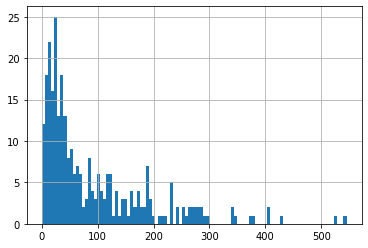

In [19]:
cook_innings.BF.hist(bins = 100)
plt.show()

## Comparison between the first `n` test innings

In [20]:
n_innings = 10 

jennings_n_innings = jenning_innings.iloc[:n_innings]
cook_n_innings = cook_innings.iloc[:n_innings]
sib_n_innings = sibley_innings.iloc[:n_innings]

jennings_col = '#706fd3'
cook_col = '#ff793f'
sib_col = '#27ae60'

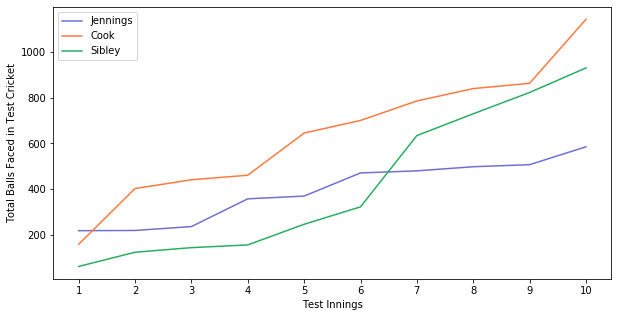

In [21]:
fig, ax = plt.subplots(figsize=(10,5))

jennings_cumsum = jennings_n_innings.BF.cumsum().rename('Jennings')
cook_cumsum = cook_n_innings.BF.cumsum().rename('Cook')
sib_cumsum = sib_n_innings.BF.cumsum().rename('Sibley')

plt.plot(jennings_cumsum, label='Jennings', c=jennings_col)
plt.plot(cook_cumsum, label='Cook', c=cook_col)
plt.plot(sib_cumsum, label='Sibley', c=sib_col)
plt.xticks(sib_cumsum.index, sib_cumsum.index + 1)
plt.xlabel('Test Innings')
plt.ylabel('Total Balls Faced in Test Cricket')
plt.legend()
plt.show()

We can compare the early career of these 3 openers, and we see that Cook is firmly ahead. Jennings is held up by a first innings century, playing in his favoured spinning conditions.  

When we do the cumulative mean, then we can see Jennings difficulties more clearly. 

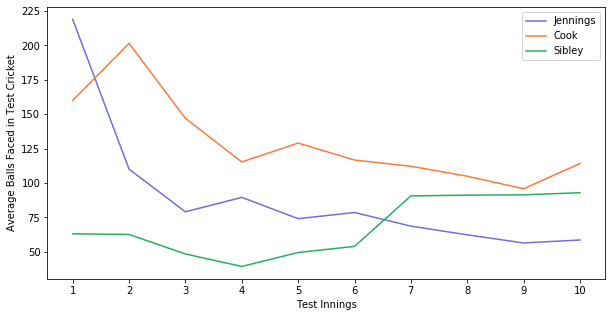

In [22]:
fig, ax = plt.subplots(figsize=(10,5))

plt.plot(jennings_n_innings.BF.cumsum() / (np.arange(len(jennings_n_innings)) + 1), 
         label='Jennings', 
         c=jennings_col)
plt.plot(cook_n_innings.BF.cumsum() / (np.arange(len(cook_n_innings)) + 1), 
         label='Cook', 
         c=cook_col)
plt.plot(sib_n_innings.BF.cumsum() / (np.arange(len(sib_n_innings)) + 1), 
         label='Sibley', 
         c=sib_col)

plt.xticks(sib_cumsum.index, sib_cumsum.index + 1)
plt.xlabel('Test Innings')
plt.ylabel('Average Balls Faced in Test Cricket')
plt.legend()
plt.show()